# <font color = 'Black'>TVS Loan Default Prediction

## <font color ='black'>Table of Contents
* Problem Statement 
* About the Dataset
* Importing Required Libraries
* Exploratory data analysis
    * Exploring the Unique Values
    * Exploring Duplicate values
    * Exploring Data Types and its Conversions
    * Exploring & Seperating Cat and Num Columns
    * Exploring Missing Values and its Proportion
    * Exploring Outliers and its Proportions
    * Exploring Magnitudes of Data
    * Exploring Cardinality of Categorical Variables
* Data Cleaning (Part-1)
    * Type Conversion (Appropriate Data Type)
    * Missing Values Treatment
    * Dropping Unwanted Columns
    * Variance Inflation Factor (VIF)
* Data Visualisation
    * Univariate Analysis
    * Bi-Variate Analysis
    * Multi-Variate Analysis
* Data Cleaning (Part-2)
    * Outlier Treatment
    * Encoding the Categorical Columns
    * Feature Scaling
* Hypothesis Testing
    * Hypothesis Testing for Numerical Variables
    * Hypothesis Testing for Categorical Variables
* Model Building
    * Assumptions of Logistic Regression and validating Assumptions
    * Model selection (Logistic Regression)    
* Performance Metrics
    * Accuracy
    * Recall
    * Precision
    * F_1 Score
* Hyper Parameter 
    * GridSearch CV
* Feature Steps
    * Data Imbalance (using Resampling Techniques)
    * Feature Selection (using Lasso, Ridge and Elastic Net)
    * Outlier Treatment

<h2 id="Problem Statement">Problem Statement</h2>

Personal loans are secured, increasing the risk of default for TVS Credit. This project aims to mitigate this risk by predicting potential defaults among existing auto loan customers targeted for personal loan cross-selling.

## <font color ='black'>About Dataset
Data consists of 119528 rows , 32 columns.
* V1: Customer ID
* V2: If a customer has bounced in first EMI (1 : Bounced, 0 : Not bounced)
* V3: Number of times bounced in recent 12 months
* V4: Maximum MOB (Month of business with TVS Credit)
* V5: Number of times bounced while repaying the loan
* V6: EMI
* V7: Loan Amount
* V8: Tenure
* V9: Dealer codes from where customer has purchased the Two wheeler
* V10: Product code of Two wheeler (MC : Motorcycle , MO : Moped, SC : Scooter)
* V11: No of advance EMI paid
* V12: Rate of interest
* V13: Gender (Male/Female)
* V14: Employment type (HOUSEWIFE : housewife, SELF : Self-employed, SAL : Salaried, PENS : Pensioner, STUDENT : Student)
* V15: Resident type of customer
* V16: Date of birth
* V17: Age at which customer has taken the loan
* V18: Number of loans
* V19: Number of secured loans
* V20: Number of unsecured loans
* V21: Maximum amount sanctioned in the Live loans
* V22: Number of new loans in last 3 months
* V23: Total sanctioned amount in the secured Loans which are Live
* V24: Total sanctioned amount in the unsecured Loans which are Live
* V25: Maximum amount sanctioned for any Two wheeler loan
* V26: Time since last Personal loan taken (in months)
* V27: Time since first consumer durables loan taken (in months)
* V28: Number of times 30 days past due in last 6 months
* V29: Number of times 60 days past due in last 6 months
* V30: Number of times 90 days past due in last 3 months
* V31: Tier ; (Customer’s geographical location)
* V32: Target variable ( 1: Defaulters / 0: Non-Defaulters)


# <font color = green> Importing Required Libraries

In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization

# Suppress warnings
import warnings  # For managing warnings in the code
warnings.filterwarnings('ignore')  # Ignore all warnings

## display all columns of the dataframe
pd.options.display.max_columns=None
## display all rows of the dataframe
pd.options.display.max_rows=None

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier


from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

from scipy import stats
from scipy.stats import shapiro, levene, mannwhitneyu
from scipy.stats import chi2_contingency

# <font color = green> Importing Dataset

In [2]:
# Read the CSV file 'TVS.csv' into a DataFrame
# Specify custom missing value indicators: '@', '#', '$', '?', ' '
df = pd.read_csv("C:/Users/rayah/OneDrive/Desktop/CAPSTONE/TVS.csv", na_values=['@', '#', '$', '?', ' '])

# Display the first 5 rows of the DataFrame
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,12.75,FEMALE,HOUSEWIFE,OWNED,30-05-1974,40.0,1,1,0,NaN,0,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,13.65,MALE,SELF,RENT,01-09-1967,47.0,1,1,0,NaN,0,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,12.65,MALE,SELF,RENT,04-05-1983,31.0,9,6,3,55000.0,0,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,9.50,FEMALE,SAL,RENT,10-12-1989,24.0,1,1,0,NaN,0,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,13.50,MALE,SAL,RENT,24-09-1984,30.0,1,1,0,NaN,0,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


# <font color = 'green'> Exploratory Data Analysis (EDA)

## <font color = 'purple'>Exploring Data Types and its Conversions 

In [3]:
# lets explore the data types of columns
df.dtypes

V1       int64
V2       int64
V3       int64
V4     float64
V5     float64
V6     float64
V7     float64
V8     float64
V9     float64
V10     object
V11    float64
V12    float64
V13     object
V14     object
V15     object
V16     object
V17    float64
V18      int64
V19      int64
V20      int64
V21    float64
V22      int64
V23    float64
V24    float64
V25    float64
V26    float64
V27    float64
V28      int64
V29      int64
V30      int64
V31     object
V32      int64
dtype: object

## <font color = 'purple'>Exploring the Unique Values

In [4]:
# unique values in each numerical column
df.select_dtypes(exclude = 'object').nunique()

V1     119528
V2          2
V3         13
V4         34
V5         24
V6       3292
V7       6289
V8         31
V9       3250
V11         7
V12      1024
V17        49
V18       121
V19       109
V20        47
V21      9900
V22         1
V23      7272
V24     10414
V25      8681
V26       224
V27       246
V28        86
V29        81
V30        46
V32         2
dtype: int64

In [5]:
# unique values in each categorical column
df.select_dtypes(include = 'object').nunique()

V10        5
V13        2
V14        5
V15        3
V16    13486
V31        4
dtype: int64

**Actually V2, V3, V10, V11, V13-V15, V31 and V32 columns are Categorical**

**V22 column is Constant**

**V4-V9, V12, V17-V21, V23-V30 columns are Numerical**

## <font color = 'purple'>Exploring Duplicate values

In [6]:
# lets explore no.of rows and columns of dataset
df.shape

(119528, 32)

**119528 rows and 32 columns are there in dataset**

In [7]:
# lets explore the no.of duplicate values in dataset
df.duplicated().sum()

0

**No duplicate Data in Dataset**

## <font color = 'purple'>Exploring & Seperating Cat and Num Columns

In [8]:
num_col = df.select_dtypes(include = np.number)
cat_col = df.select_dtypes(include = object)

# lets explore the numerical columns
num_col.head(1)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V11,V12,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,0.0,12.75,40.0,1,1,0,NaN,0,NaN,NaN,46500.0,NaN,NaN,0,0,0,0


In [9]:
# lets explore the categorical columns
cat_col.head(1)

,V10,V13,V14,V15,V16,V31
0,SC,FEMALE,HOUSEWIFE,OWNED,30-05-1974,TIER 1


**V4-V9, V12, V17-V21, V23-V30 are Numerical columns**

**V2, V3,'V10', V11, 'V13', 'V14', 'V15', 'V16', 'V31' are Categorical Columns.**

**Type Conversion needed for V2, V3, V11, V32 and V16 columns**


In [10]:
# lets explore the unique values in categoric columns
unique_values = {column: cat_col[column].unique() for column in cat_col.columns}
for column, values in unique_values.items():
    print(f"Unique values for column {column}:")
    print(values)
    print()

Unique values for column V10:
['SC' 'MO' 'MC' 'TL' 'RETOP' nan]

Unique values for column V13:
['FEMALE' 'MALE' nan]

Unique values for column V14:
['HOUSEWIFE' 'SELF' 'SAL' 'STUDENT' 'PENS' nan]

Unique values for column V15:
['OWNED' 'RENT' nan 'OWENED BY OFFICE']

Unique values for column V16:
['30-05-1974' '01-09-1967' '04-05-1983' ... '22-09-1960' '24-09-1965' nan]

Unique values for column V31:
['TIER 1' 'TIER 4' 'TIER 3' 'TIER 2']



**Encoding is needed for V10, V13, V14, V15, V31 columns**

**No need to encode the V16, we are dropping it**

## <font color = 'purple'>Exploring Missing Values and its Proportion

In [11]:
# Count missing values in each column
missing_count = df.isnull().sum()

# Calculate proportion of missing values
total_values = df.shape[0]
missing_proportion = missing_count / total_values * 100  # Multiply by 100 for percentage

# Create a DataFrame to display missing values information
missing_info = pd.DataFrame({
    'Missing Values Count': missing_count,
    'Total Values': total_values,
    'Missing Value Percentage': missing_proportion
})

print("Missing values information:")
missing_info.sort_values(by='Missing Value Percentage',ascending=False)


Missing values information:


,Missing Values Count,Total Values,Missing Value Percentage
V26,106097,119528,88.763302
V24,100500,119528,84.080717
V23,100247,119528,83.869052
V27,99095,119528,82.905261
V21,82902,119528,69.357807
V15,35397,119528,29.613982
V11,34480,119528,28.846797
V16,34480,119528,28.846797
V14,34480,119528,28.846797
V12,34480,119528,28.846797


**V21, V23, V24, V26, V27 has High null values**

**V4 - V16 and V25 has Moderate null values**

**V1-V3, V18-V20, V22, V28-V32 has no null values**

## <font color = 'purple'>Exploring Outliers and its Proportions

In [12]:

# Select only numerical columns
df1 = df.select_dtypes(include=[np.number])

# Calculate quartiles and IQR for each column
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers using IQR method
outliers = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR)))

# Count outliers in each column
outliers_count = outliers.sum()

# Calculate the proportion of outliers
total_values = df1.shape[0]
outliers_proportion = outliers_count / total_values * 100  # Multiply by 100 for percentage

# Step 7: Create a DataFrame to store outlier information
outliers_data = pd.DataFrame({
    'Outliers Count': outliers_count,
    'Total Values': total_values,
    'Outliers Proportion (%)': outliers_proportion
})

# Step 8: Print outlier information
print("Outliers information:")
outliers_data.sort_values(by='Outliers Proportion (%)', ascending=False)



Outliers information:


,Outliers Count,Total Values,Outliers Proportion (%)
V28,23657,119528,19.792015
V29,19086,119528,15.967807
V19,15773,119528,13.196071
V20,13338,119528,11.158892
V18,12933,119528,10.820059
V30,12766,119528,10.680343
V9,11099,119528,9.285690
V11,6413,119528,5.365270
V5,6156,119528,5.150258
V3,4464,119528,3.734690


**V4-V9, V12, V18-V21, V23-V30 has outliers**

## <font color = 'purple'> Exploring Magnitudes of Data

In [13]:
# Displaying the first few rows of the subsetted dataframe
num_col.head().T

,0,1,2,3,4
V1,1.00,2.00,3.00,4.0,5.0
V2,0.00,0.00,0.00,0.0,0.0
V3,0.00,1.00,0.00,0.0,0.0
V4,24.00,24.00,26.00,24.0,27.0
V5,0.00,1.00,0.00,0.0,0.0
V6,2432.00,1495.00,1707.00,2128.0,1824.0
V7,46500.00,28168.00,38900.00,42900.0,40900.0
V8,24.00,24.00,30.00,24.0,30.0
V9,1385.00,2496.00,1346.00,1375.0,4140.0
V11,0.00,0.00,0.00,2.0,0.0


 **V6, V7, V9, V21, V24, V25 columns need scaling**

## <font color = 'purple'>Exploring Cardinality of Categorical Variables

In [14]:
# Displaying the first few rows of the cat_col dataframe
cat_col.head()

,V10,V13,V14,V15,V16,V31
0,SC,FEMALE,HOUSEWIFE,OWNED,30-05-1974,TIER 1
1,MO,MALE,SELF,RENT,01-09-1967,TIER 1
2,SC,MALE,SELF,RENT,04-05-1983,TIER 1
3,SC,FEMALE,SAL,RENT,10-12-1989,TIER 1
4,MC,MALE,SAL,RENT,24-09-1984,TIER 1


**Cardinality of Categorical Variables**

**V10 = 5,  V13 = 2,  V14 = 5,  V15 = 3  and  V31 = 4**

# <font color = 'green'>Data Cleaning Part-1

In [15]:
# dropping unnecessary columns
df.drop('V1',axis = 1, inplace = True)

## <font color = 'purple'>Type Conversion (Appropriate Data Type)

In [16]:
# changing V16 column to appropriate data type
df['V16'] = pd.to_datetime(df['V16'], format='%d-%m-%Y')
df['V2']  = df['V2'].astype('object')
df['V3']  = df['V3'].astype('object')
df['V10'] = df['V10'].astype('object')
df['V11'] = df['V11'].astype('object')
df['V32'] = df['V32'].astype('object')

In [17]:
df.dtypes

V2             object
V3             object
V4            float64
V5            float64
V6            float64
V7            float64
V8            float64
V9            float64
V10            object
V11            object
V12           float64
V13            object
V14            object
V15            object
V16    datetime64[ns]
V17           float64
V18             int64
V19             int64
V20             int64
V21           float64
V22             int64
V23           float64
V24           float64
V25           float64
V26           float64
V27           float64
V28             int64
V29             int64
V30             int64
V31            object
V32            object
dtype: object

## <font color = 'purple'>Missing Values Treatment

In [18]:
# Dropping columns having null value percentage more than 30%
df = df.drop(['V21','V23','V24','V26','V27','V16'],axis = 1)

In [19]:
# Dropping rows which have 28% missing data.
# Calculate the threshold for dropping rows
thresh = len(df.columns) * 0.28

# Drop rows with more than 28% missing values
df = df.dropna(thresh=len(df.columns) - thresh)
print(df.columns)
print(df.shape)

Index(['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
       'V13', 'V14', 'V15', 'V17', 'V18', 'V19', 'V20', 'V22', 'V25', 'V28',
       'V29', 'V30', 'V31', 'V32'],
      dtype='object')
(85048, 25)


In [20]:
# Count missing values in each column
missing_count = df.isnull().sum()

# Calculate proportion of missing values
total_values = df.shape[0]
missing_proportion = missing_count / total_values * 100  # Multiply by 100 for percentage

# Create a DataFrame to display missing values information
missing_info_without_rows = pd.DataFrame({
    'Missing Values Count': missing_count,
    'Total Values': total_values,
    'Missing Value Percentage': missing_proportion
})

print("Missing values after treating :")
print(missing_info_without_rows.sort_values(by='Missing Value Percentage',ascending=False))


Missing values after treating :
     Missing Values Count  Total Values  Missing Value Percentage
V25                 10730         85048                 12.616405
V15                   917         85048                  1.078215
V2                      0         85048                  0.000000
V31                     0         85048                  0.000000
V30                     0         85048                  0.000000
V29                     0         85048                  0.000000
V28                     0         85048                  0.000000
V22                     0         85048                  0.000000
V20                     0         85048                  0.000000
V19                     0         85048                  0.000000
V18                     0         85048                  0.000000
V17                     0         85048                  0.000000
V14                     0         85048                  0.000000
V3                      0         85048     

In [21]:
# Missing values imputation
df['V15'].fillna('OWNED',inplace = True)
df['V25'].fillna(42250,inplace = True)

In [22]:
# lets explore the missing values after imputation
df.isna().sum()

V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V17    0
V18    0
V19    0
V20    0
V22    0
V25    0
V28    0
V29    0
V30    0
V31    0
V32    0
dtype: int64

## <font color = 'purple'>Dropping Unwanted Columns

In [23]:
# Dropping the column 'V22' from the dataframe df along the columns axis (axis=1)
df = df.drop('V22', axis=1)

## <font color = 'purple'>Variance Inflation Factor (VIF)

In [24]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns (VIF is calculated for numeric data)
numeric_df = df.select_dtypes(include=np.number)

# Handle missing values - option 1: drop rows with missing values
numeric_df = numeric_df.dropna()

# Alternatively, handle missing values - option 2: fill missing values
# numeric_df = numeric_df.fillna(numeric_df.mean())

# Check for infinite values and replace them with NaNs
numeric_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaNs after replacing inf values
numeric_df.dropna(inplace=True)

# Calculate VIF for each numeric feature
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

print(vif_data.sort_values(by='VIF',ascending=False))

   feature         VIF
3       V7  112.704809
4       V8  110.961334
2       V6   56.833825
0       V4   51.582323
13     V29   43.531314
11     V25   30.584501
12     V28   22.325887
8      V18   20.207169
14     V30   15.106749
6      V12   14.339085
9      V19   14.286595
7      V17   14.029417
10     V20    3.763474
5       V9    1.993434
1       V5    1.514216


In [27]:
data = df.copy()

**High VIFs: Features V7, V8, V6, V4, V25, V28, V29, V30, V12, V19, V17 (> 10).**

**Low VIFs: Features V20, V9, V5 (between 5 and 1).**

**Removing features is not an option, explore alternative modeling techniques like ridge regression or LASSO regression that are less sensitive to multicollinearity**

In [28]:
# Save the cleaned data to a CSV file
data.to_csv('Data_without_Scaling_&_without_Outliers_Treatment.csv', index=False)

# <font color = 'green'> Data Visualization

In [28]:
#Load data from the file path of csv as a DataFrame object
df5 = pd.read_csv('Data_without_Scaling_&_without_Outliers_Treatment.csv', na_values=['@', '#', '$', '?', ' '])

#Rename columns to identify data in it
df_1 = df5.rename(columns={
'V2': 'Customer has bounced in first EMI', 
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced repaying loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes of the Two wheeler',
'V10': 'Product code of Two wheeler', 
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V17': 'Customer age when loan was taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due (last 6 months)',
'V29': 'No of times 60 days past due (last 6 months)',
'V30': 'No of times 90 days past due (last 3 months)',
'V31': 'Tier',
'V32': 'Target variable'})

df_1.columns

Index(['Customer has bounced in first EMI', 'No of times bounced 12 months',
       'Maximum MOB', 'No of times bounced repaying loan', 'EMI',
       'Loan Amount', 'Tenure', 'Dealer codes of the Two wheeler',
       'Product code of Two wheeler', 'No of advance EMI paid',
       'Rate of interest', 'Gender', 'Employment type',
       'Resident type of customer', 'Customer age when loan was taken',
       'No of loans', 'No of secured loans', 'No of unsecured loans', 'V25',
       'No of times 30 days past due (last 6 months)',
       'No of times 60 days past due (last 6 months)',
       'No of times 90 days past due (last 3 months)', 'Tier',
       'Target variable'],
      dtype='object')

# <font color = 'green'>Data Cleaning Part-2

## <font color = 'purple'>Outlier Treatment

In [34]:
# Reading the CSV file 'Data_without_Scaling_&_Outliers_Treatment.csv' into a pandas dataframe named df1
df1 = pd.read_csv('Data_without_Scaling_&_without_Outliers_Treatment.csv')


In [35]:
# Identify numeric columns
numeric_columns = df1.select_dtypes(include=['number']).columns

# Calculate quartiles and IQR for each numeric column
Q1 = df1[numeric_columns].quantile(0.25)
Q3 = df1[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers using IQR method
outliers = ((df1[numeric_columns] < (Q1 - 1.5 * IQR)) | (df1[numeric_columns] > (Q3 + 1.5 * IQR)))

# Count outliers in each numeric column
outliers_count = outliers.sum()

# Calculate the proportion of outliers
total_values = df1.shape[0]
outliers_proportion = outliers_count / total_values * 100  # Multiply by 100 for percentage

# Create a DataFrame to store outlier information
outliers_data = pd.DataFrame({
    'Outliers Count': outliers_count,
    'Total Values': total_values,
    'Outliers Proportion (%)': outliers_proportion
})

print("Outliers information:")
print(outliers_data.sort_values(by='Outliers Proportion (%)', ascending=False))


Outliers information:
     Outliers Count  Total Values  Outliers Proportion (%)
V28           16985         85048                19.971075
V29           13692         85048                16.099144
V19           11351         85048                13.346581
V9            11099         85048                13.050277
V20            9515         85048                11.187800
V18            9275         85048                10.905606
V30            9153         85048                10.762158
V11            6413         85048                 7.540448
V5             6156         85048                 7.238265
V8             3796         85048                 4.463362
V3             3131         85048                 3.681450
V12            2523         85048                 2.966560
V2             2450         85048                 2.880726
V4             1908         85048                 2.243439
V32            1854         85048                 2.179945
V6              757         85048 

**V2-V9, V11, V12, V18-V20, V25, V28-V30, V32 columns need outlier treatment**

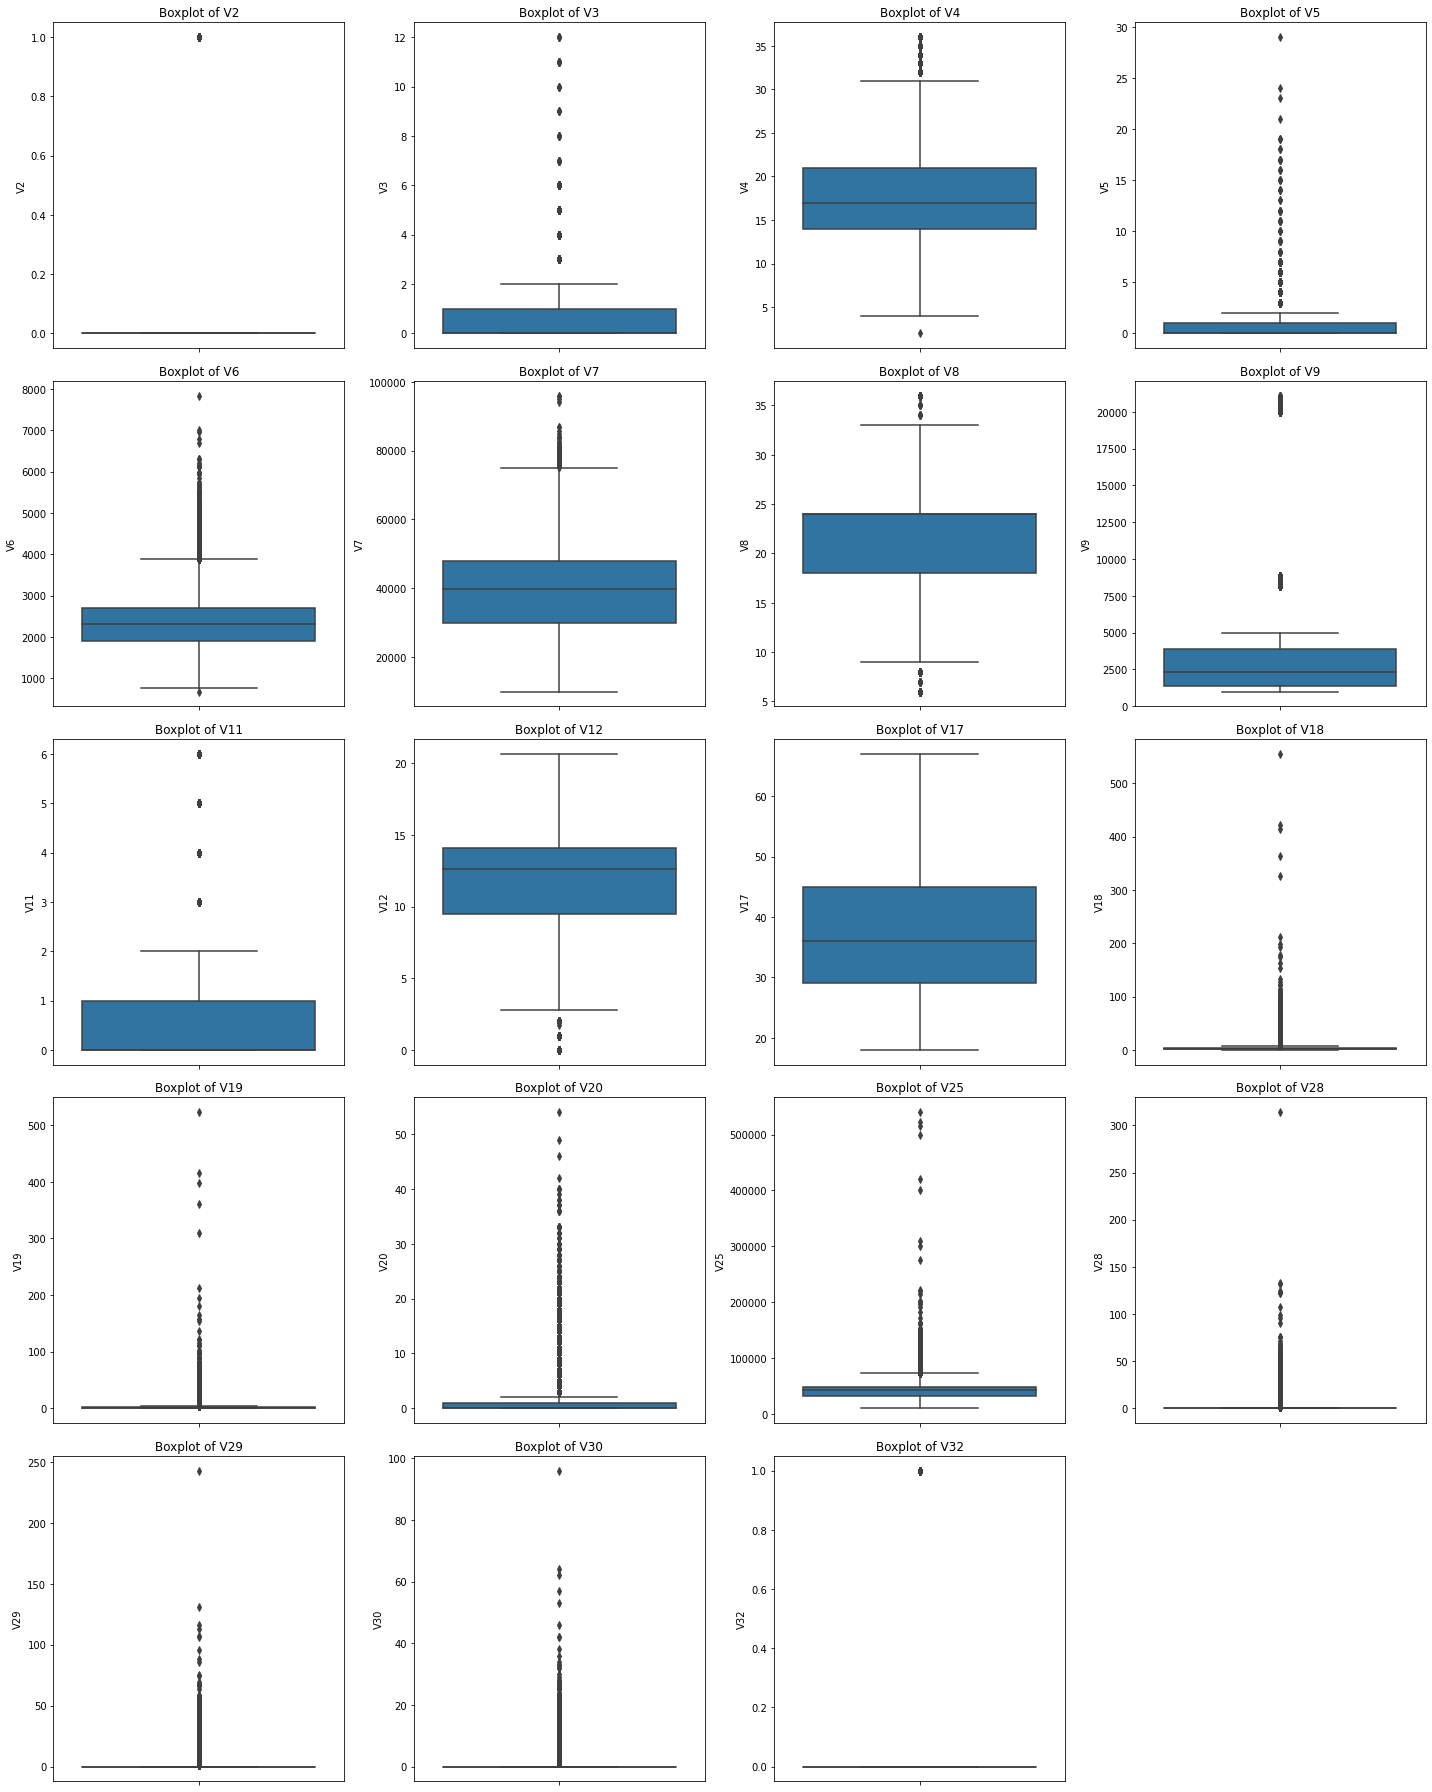

In [36]:
# Select numerical columns
num_cols = df1.select_dtypes(include=np.number).columns

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each numerical column in a separate subplot
for i, col in enumerate(num_cols):
    sns.boxplot(y=df1[col], ax=axes[i])  # Use y instead of x to plot vertically
    axes[i].set_title(f'Boxplot of {col}')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [37]:
# Looping through each numerical column in DataFrame 'df1'
for col in df1.select_dtypes(include='number'):
    # Calculating the lower and upper limits (5th and 95th percentiles) for each numerical column
    lower_limit = df1[col].quantile(0.05)
    upper_limit = df1[col].quantile(0.95)
    
    # Applying a lambda function to each element in the column to cap values below the lower limit at the lower limit,
    # values above the upper limit at the upper limit, and leave values within the limits unchanged
    df1[col] = df1[col].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)


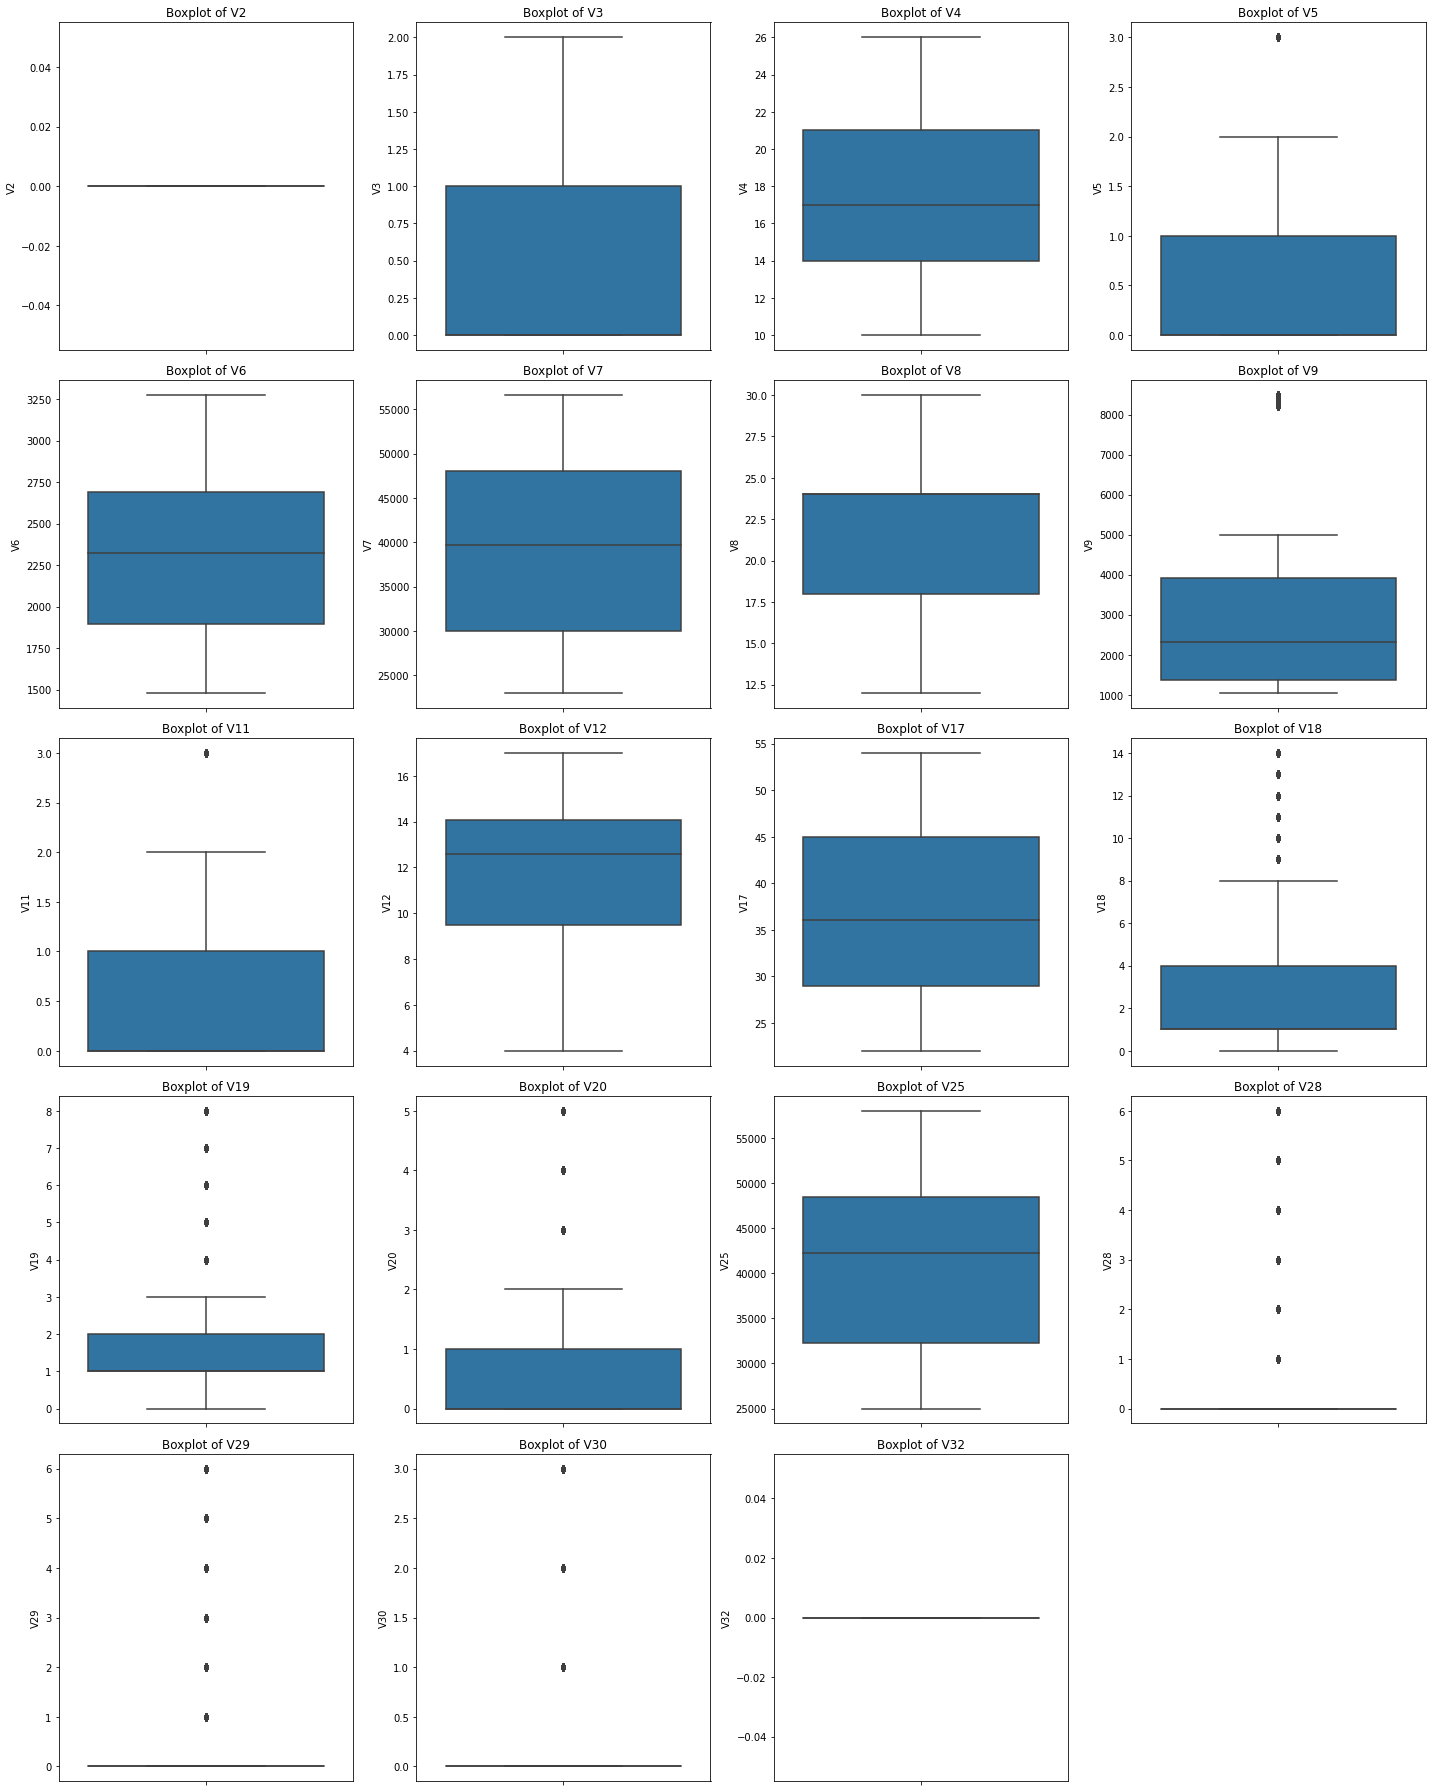

In [38]:
# Select numerical columns
num_cols = df1.select_dtypes(include=np.number).columns

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each numerical column in a separate subplot
for i, col in enumerate(num_cols):
    sns.boxplot(y=df1[col], ax=axes[i])  # Use y instead of x to plot vertically
    axes[i].set_title(f'Boxplot of {col}')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## <font color = 'purple'>Encoding the Categorical Columns

In [42]:
# Columns to be one-hot encoded
columns_to_encode = ['V10', 'V13', 'V14', 'V15', 'V31']


# One-Hot Encoding
df1 = pd.get_dummies(df1, columns=columns_to_encode, prefix=columns_to_encode, drop_first=True)

# Display the encoded data
print(df1.columns)
print(df1.shape)


Index(['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V11', 'V12', 'V17',
       'V18', 'V19', 'V20', 'V25', 'V28', 'V29', 'V30', 'V32', 'V10_MO',
       'V10_RETOP', 'V10_SC', 'V10_TL', 'V13_MALE', 'V14_PENS', 'V14_SAL',
       'V14_SELF', 'V14_STUDENT', 'V15_OWNED', 'V15_RENT', 'V31_TIER 2',
       'V31_TIER 3', 'V31_TIER 4'],
      dtype='object')
(85048, 33)


In [43]:
# Save the cleaned data to a CSV file
df1.to_csv('Data_with_Outlier_Treatment.csv', index=False)

# <font color = 'green'>Feature Scaling

## <font color = 'purple'>Data with Robust Scaling and Without Outlier Treatment

In [155]:
# Reading the CSV file named 'Data_without_Scaling_&_Outliers_Treatment.csv' into a DataFrame named df3
df3 = pd.read_csv('Data_without_Scaling_&_without_Outliers_Treatment.csv')

In [111]:
# Importing the RobustScaler from sklearn.preprocessing
from sklearn.preprocessing import RobustScaler

# Creating an instance of RobustScaler
scaler = RobustScaler()

# Specifying the columns to be scaled using RobustScaler
columns_to_scale = ['V6', 'V7', 'V9', 'V25']

# Selecting the specified columns from the dataframe df3
columns = df3[columns_to_scale]

# Scaling the selected columns using RobustScaler and fitting the scaler to the data
robust_scale = scaler.fit_transform(columns)

# Assigning the scaled values back to the respective columns in the dataframe df3
df3[columns_to_scale] = robust_scale


In [112]:
# Transpose the first few rows of the dataframe df3
transposed_df = df3.head().T

# Display the transposed dataframe
transposed_df


,0,1,2,3,4
V2,0,0,0,0,0
V3,0,1,0,0,0
V4,24.0,24.0,26.0,24.0,27.0
V5,0.0,1.0,0.0,0.0,0.0
V6,0.141058,-1.039043,-0.77204,-0.241814,-0.624685
V7,0.377778,-0.640667,-0.044444,0.177778,0.066667
V8,24.0,24.0,30.0,24.0,30.0
V9,-0.362564,0.074322,-0.3779,-0.366496,0.720802
V10,SC,MO,SC,SC,MC
V11,0.0,0.0,0.0,2.0,0.0


In [113]:
# Save the cleaned data to a CSV file
df3.to_csv('Data_with_Robust_scale_&_Without_Outlier_Treatment.csv', index=False)

## <font color = 'purple'>Data with Standard Scaling and With Outlier Treatment

In [114]:
# Reading the CSV file 'Data_with_Outlier_Treatment.csv' into a pandas DataFrame named df4
df4 = pd.read_csv('Data_with_Outlier_Treatment.csv')

# Displaying the first few rows of the DataFrame df4 to inspect the data
df4.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V11,V12,...,V13_MALE,V14_PENS,V14_SAL,V14_SELF,V14_STUDENT,V15_OWNED,V15_RENT,V31_TIER 2,V31_TIER 3,V31_TIER 4
0,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,0.0,12.75,...,0,0,0,0,0,1,0,0,0,0
1,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,0.0,13.65,...,1,0,0,1,0,0,1,0,0,0
2,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,0.0,12.65,...,1,0,0,1,0,0,1,0,0,0
3,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,2.0,9.50,...,0,0,1,0,0,0,1,0,0,0
4,0,0,26.0,0.0,1824.0,40900.0,30.0,4140.0,0.0,13.50,...,1,0,1,0,0,0,1,0,0,0


In [115]:
# Importing StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler object
scaler = StandardScaler()

# Selecting the columns to be scaled
columns_to_scale = ['V6', 'V7', 'V9', 'V25']

# Extracting the selected columns from the dataframe
columns = df4[columns_to_scale]

# Standardizing the selected columns using fit_transform method of StandardScaler
standard_scale = scaler.fit_transform(columns)

# Assigning the standardized values back to the original dataframe
df4[columns_to_scale] = standard_scale


In [116]:
# Transpose the first few rows of the dataframe df4
transposed_df = df4.head().T

# Display the transposed dataframe
transposed_df


,0,1,2,3,4
V2,0.000000,0.000000,0.000000,0.000000,0.000000
V3,0.000000,1.000000,0.000000,0.000000,0.000000
V4,24.000000,24.000000,26.000000,24.000000,26.000000
V5,0.000000,1.000000,0.000000,0.000000,0.000000
V6,0.228207,-1.586950,-1.176263,-0.360702,-0.949611
V7,0.712521,-1.073606,-0.027964,0.361765,0.166900
V8,24.000000,24.000000,30.000000,24.000000,30.000000
V9,-0.747119,-0.268336,-0.763926,-0.751428,0.440142
V11,0.000000,0.000000,0.000000,2.000000,0.000000
V12,12.750000,13.650000,12.650000,9.500000,13.500000


In [118]:
# Save the cleaned data to a CSV file
df4.to_csv('Data_with_Standard_scale_&_With_Outlier_Treatment.csv', index=False)

# <font color = 'green'>Hypothesis Testing

In [119]:
# Read the CSV file into a pandas DataFrame
df2 = pd.read_csv('Data_without_Scaling_&_without_Outliers_Treatment.csv')

# Display the first few rows of the DataFrame to inspect the data
df2.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V17,V18,V19,V20,V25,V28,V29,V30,V31,V32
0,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,...,40.0,1,1,0,46500.0,0,0,0,TIER 1,0
1,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,...,47.0,1,1,0,28168.0,0,0,0,TIER 1,0
2,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,...,31.0,9,6,3,38900.0,31,31,16,TIER 1,0
3,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,...,24.0,1,1,0,42900.0,0,0,0,TIER 1,0
4,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,...,30.0,1,1,0,40900.0,0,0,0,TIER 1,0


## <font color = 'purple'>Hypothesis Testing for Numerical Variables

In [62]:
from scipy import stats

# Split data into features (X) and the target variable (y)
X = df2.drop("V32", axis=1)  # Replace "V32" with your actual target column name
y = df2["V32"]

X = X.select_dtypes(include=np.number)

# Check for class imbalance
print(y.value_counts())  # This will show the distribution of classes

# Function to get 100 samples from each class
def get_samples(feature, y, class_label, n_samples=1500):
    return feature[y == class_label].sample(n=n_samples, random_state=1, replace=True)

# Perform hypothesis testing for all features using Mann-Whitney U test
p_values = []
significant_features = []
for feature in X.columns:
    # Get 100 samples from each class
    sample_class_0 = get_samples(X[feature], y, 0)
    sample_class_1 = get_samples(X[feature], y, 1)

    # Perform the Mann-Whitney U test
    u_stat, p_value = stats.mannwhitneyu(sample_class_0, sample_class_1)
    p_values.append(p_value)

    # Determine significance
    if p_value < 0.05:
        significant_features.append(feature)
    else:
        significant_features.append("Not Significant")

# Create a table to display results
data = {
    'Feature': X.columns,
    'p-value': p_values,
    'Significant': significant_features
}
table = pd.DataFrame(data)
table


0    83194
1     1854
Name: V32, dtype: int64


,Feature,p-value,Significant
0,V2,9.724173e-02,Not Significant
1,V3,5.870829e-23,V3
2,V4,1.383230e-03,V4
3,V5,4.228057e-25,V5
4,V6,7.279005e-01,Not Significant
5,V7,1.538868e-03,V7
6,V8,6.585025e-05,V8
7,V9,1.053188e-04,V9
8,V11,1.518504e-02,V11
9,V12,9.019174e-01,Not Significant


## <font color = 'purple'>Hypothesis Testing for Categorical Variables

In [63]:
# Split data into features (X) and the target variable (y)
X = df2.drop("V32", axis=1)  # Replace "V32" with your actual target column name
y = df2["V32"]

# Select categorical features only
categorical_X = X.select_dtypes(include=object)

# Check for class imbalance
print(y.value_counts())  # This will show the distribution of classes

# Function to get balanced samples from each class (not used here)
def get_samples(feature, y, class_label, n_samples=1500):
    """
    This function retrieves a balanced sample size (n_samples) from each class (class_label)
    for the chosen feature. (Not used for Chi-Square test)
    """
    return feature[y == class_label].sample(n=n_samples, random_state=1, replace=True)


# Perform Chi-Square test for categorical features
p_values = []
significant_features = []
for feature in categorical_X.columns:
    # Create a contingency table
    contingency_table = pd.crosstab(categorical_X[feature], y)

    # Chi-Square test using chi2_contingency
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table.values)

    p_values.append(p_value)
    significant_features.append("Yes" if p_value < 0.05 else "No")

# Create a table to display results
data = {"Feature": categorical_X.columns, "p-value": p_values, "Significant": significant_features}
table = pd.DataFrame(data)
table


0    83194
1     1854
Name: V32, dtype: int64


,Feature,p-value,Significant
0,V10,3.697350e-17,Yes
1,V13,1.099245e-05,Yes
2,V14,2.023093e-08,Yes
3,V15,9.470916e-02,No
4,V31,4.236060e-45,Yes


## <font color = 'purple'>Hypothesis Testing for Numerical Variables

Shapiro-Wilk test for V6 in Class 0: stat=0.9787, p-value=0.0000
Shapiro-Wilk test for V6 in Class 1: stat=0.9832, p-value=0.0000
Shapiro-Wilk test for V7 in Class 0: stat=0.9758, p-value=0.0000
Shapiro-Wilk test for V7 in Class 1: stat=0.9793, p-value=0.0000
Shapiro-Wilk test for V9 in Class 0: stat=0.5999, p-value=0.0000
Shapiro-Wilk test for V9 in Class 1: stat=0.5633, p-value=0.0000
Shapiro-Wilk test for V17 in Class 0: stat=0.9688, p-value=0.0000
Shapiro-Wilk test for V17 in Class 1: stat=0.9578, p-value=0.0000
Shapiro-Wilk test for V25 in Class 0: stat=0.9027, p-value=0.0000
Shapiro-Wilk test for V25 in Class 1: stat=0.5017, p-value=0.0000


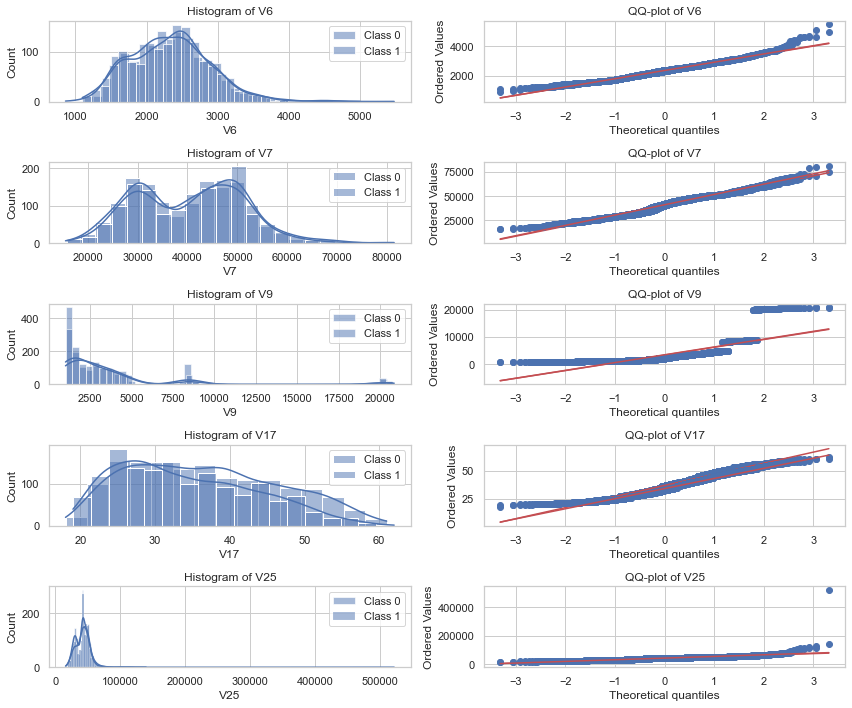

Homogeneity of variances test for V6: p-value = 0.2319
Homogeneity of variances test for V7: p-value = 0.0391
Homogeneity of variances test for V9: p-value = 0.4235
Homogeneity of variances test for V17: p-value = 0.0000
Homogeneity of variances test for V25: p-value = 0.9010


In [64]:
# Columns of interest
columns_of_interest = ['V6', 'V7', 'V9', 'V17', 'V25']

# Split data into features (X) and the target variable (y)
X = df2[columns_of_interest]
y = df2["V32"]  # Replace "V32" with your actual target column name

# Check for normality and visualize normality using QQ-plots for each numerical feature
fig, axes = plt.subplots(nrows=len(columns_of_interest), ncols=2, figsize=(12, 2 * len(columns_of_interest)))
for idx, col in enumerate(columns_of_interest):
    for group in y.unique():
        # Sample 1500 data points from each group if available
        data_group = X[y == group][col].sample(n=1500, random_state=1)
        stat, p_value = stats.shapiro(data_group)
        print(f"Shapiro-Wilk test for {col} in Class {group}: stat={stat:.4f}, p-value={p_value:.4f}")
        sns.histplot(data_group, kde=True, ax=axes[idx, 0], label=f"Class {group}")
        axes[idx, 0].set_title(f"Histogram of {col}")
        axes[idx, 0].legend()
        stats.probplot(data_group, dist="norm", plot=axes[idx, 1])
        axes[idx, 1].set_title(f"QQ-plot of {col}")
plt.tight_layout()
plt.show()

# Check for homogeneity of variances using Levene's test for each numerical feature
for col in columns_of_interest:
    stat, p_value = stats.levene(X[col][y == 0], X[col][y == 1])
    print(f"Homogeneity of variances test for {col}: p-value = {p_value:.4f}")


**The feature "V2,V3,V4,V5,V6,V20,V25,V28,V29,V30" does not follow a normal distribution for either class 0 or class 1.**

**Both the classes violating the normality.**

**The variances between the groups are not equal, indicating a violation of the homogeneity of variances assumption.**

In [65]:
# Split data into features (X) and the target variable (y)
X = df2.drop("V32", axis=1)  # Replace "V32" with your actual target column name
y = df2["V32"]

# Check for class imbalance (optional)
print(y.value_counts())  # This will show the distribution of classes

# Function to get balanced samples from each class
def get_samples(feature, y, class_label, n_samples=1500):
  """
  This function retrieves a balanced sample size (n_samples) from each class (class_label)
  for the chosen feature.
  """
  return feature[y == class_label].sample(n=n_samples, random_state=1, replace=True)

# List of features to analyze
features_to_analyze = ['V6', 'V7', 'V9', 'V17', 'V25']

# Loop through each feature
for feature_name in features_to_analyze:
    # Get balanced samples from each class
    sample_class_0 = get_samples(X[feature_name], y, 0)
    sample_class_1 = get_samples(X[feature_name], y, 1)

    # Step 1: State the H0 and H1
    # H0: The distributions of the feature for class 0 and class 1 are the same.
    # H1: The distributions of the feature for class 0 and class 1 are different.

    # Step 2: Compute the test statistic
    u_stat, p_value = stats.mannwhitneyu(sample_class_0, sample_class_1)

    # Step 3: Skip comparing with table value (using p-value for decision)

    # Step 4: Decision rule based on alpha (significance level)
    alpha = 0.05
    if p_value < alpha:
        decision = 'Significant'  # Feature is significant
    else:
        decision = 'Not Significant'  # Feature might not be significant

    # Step 5: Draw the conclusion
    conclusion = f"Feature: {feature_name}, U statistic: {u_stat}, p-value: {p_value}, Decision: {decision}"

    print(conclusion)


0    83194
1     1854
Name: V32, dtype: int64
Feature: V6, U statistic: 1116746.5, p-value: 0.7279005338911648, Decision: Not Significant
Feature: V7, U statistic: 1049871.0, p-value: 0.0015388677987515226, Decision: Significant
Feature: V9, U statistic: 1033009.5, p-value: 0.00010531883343234499, Decision: Significant
Feature: V17, U statistic: 1255361.5, p-value: 3.8370199947852466e-08, Decision: Significant
Feature: V25, U statistic: 1041724.0, p-value: 0.0004413529771531678, Decision: Significant


## <font color = 'purple'>Hypothesis Testing for Categorical Variables

In [66]:

# List of categorical columns
categorical_columns = ['V10','V13','V14','V15','V31']  # Replace with your actual categorical column names

# Significance level
alpha = 0.05

# Perform Chi-Square Test
for col in categorical_columns:
    contingency_table = pd.crosstab(df2[col], df2['V32'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    significant = p_value < alpha
    significance_text = "Significant" if significant else "Not Significant"
    print(f"Chi-Square Test for {col}: chi2={chi2:.4f}, p-value={p_value:.4f}, dof={dof} - {significance_text}")


Chi-Square Test for V10: chi2=83.1758, p-value=0.0000, dof=4 - Significant
Chi-Square Test for V13: chi2=19.3307, p-value=0.0000, dof=1 - Significant
Chi-Square Test for V14: chi2=41.5957, p-value=0.0000, dof=4 - Significant
Chi-Square Test for V15: chi2=4.7139, p-value=0.0947, dof=2 - Not Significant
Chi-Square Test for V31: chi2=209.2468, p-value=0.0000, dof=3 - Significant
